In [1]:
#

# Optimization in Machine Learning  
## Learning Rate Scheduling & Adaptive Optimizers

---

## 1. Why Optimization Needs More Than Plain Gradient Descent

### Gradient Descent Recap
Gradient Descent updates model parameters by moving them in the opposite direction of the gradient:

$$
w_{t+1} = w_t - \alpha \nabla J(w_t)
$$

- $\alpha$: learning rate (step size)
- $\nabla J(w_t)$: gradient of the loss

### Problem with a Fixed Learning Rate
- If $\alpha$ is **too large** → overshooting, divergence
- If $\alpha$ is **too small** → very slow learning

Also:
- Different features behave differently
- Some features appear often (dense)
- Some appear rarely (sparse)

Using **one learning rate for all parameters** is inefficient.

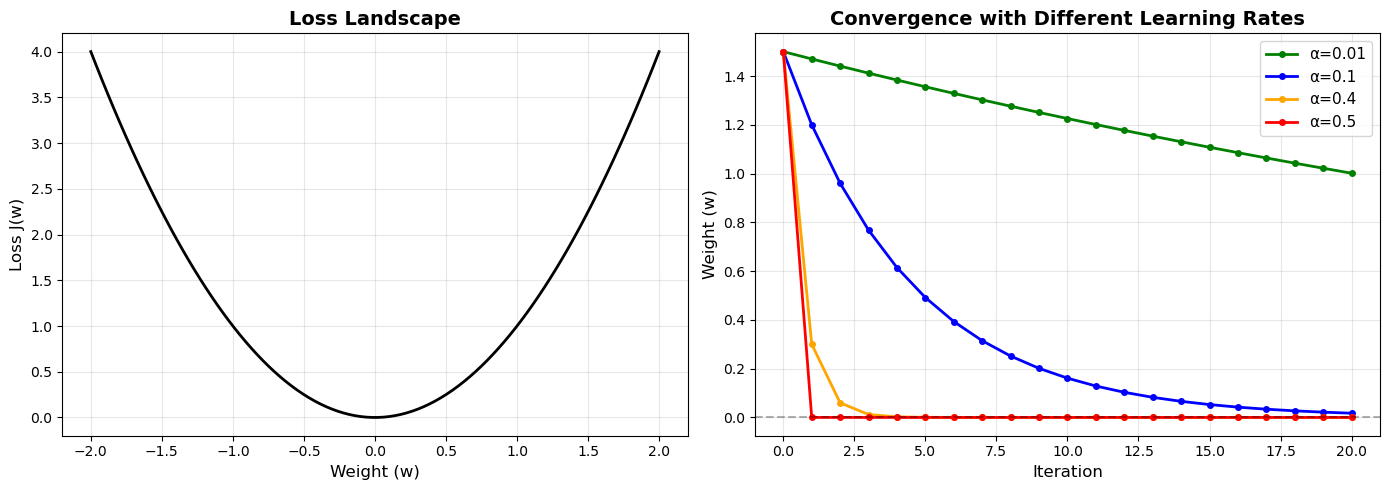

Key Observations:
✓ α=0.01 (green): Too small → very slow convergence
✓ α=0.1 (blue): Good → smooth convergence
✓ α=0.4 (orange): Large → oscillations but converges
✗ α=0.5 (red): Too large → diverges!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Set random seed for reproducibility
np.random.seed(42)

# Visualization 1: Effect of Different Learning Rates
def visualize_learning_rates():
    """Show how different learning rates affect convergence"""
    # Simple quadratic loss function
    def loss(w):
        return w**2
    
    def gradient(w):
        return 2*w
    
    # Different learning rates
    alphas = [0.01, 0.1, 0.4, 0.5]
    colors = ['green', 'blue', 'orange', 'red']
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot 1: Loss function landscape
    w_range = np.linspace(-2, 2, 100)
    loss_vals = loss(w_range)
    axes[0].plot(w_range, loss_vals, 'k-', linewidth=2, label='Loss function')
    axes[0].set_xlabel('Weight (w)', fontsize=12)
    axes[0].set_ylabel('Loss J(w)', fontsize=12)
    axes[0].set_title('Loss Landscape', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Convergence with different learning rates
    for alpha, color in zip(alphas, colors):
        w = 1.5  # Starting point
        w_history = [w]
        
        for _ in range(20):
            w = w - alpha * gradient(w)
            w_history.append(w)
        
        axes[1].plot(range(len(w_history)), w_history, 'o-', 
                    label=f'α={alpha}', color=color, linewidth=2, markersize=4)
    
    axes[1].set_xlabel('Iteration', fontsize=12)
    axes[1].set_ylabel('Weight (w)', fontsize=12)
    axes[1].set_title('Convergence with Different Learning Rates', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)
    axes[1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("Key Observations:")
    print("✓ α=0.01 (green): Too small → very slow convergence")
    print("✓ α=0.1 (blue): Good → smooth convergence")
    print("✓ α=0.4 (orange): Large → oscillations but converges")
    print("✗ α=0.5 (red): Too large → diverges!")

visualize_learning_rates()

---

## 2. Learning Rate Scheduling

### What is Learning Rate Scheduling?
Changing the learning rate **during training** instead of keeping it fixed.

### Intuition
Think of walking down a mountain:
- Far away from the minimum → take big steps
- Near the minimum → take small careful steps

### Why it helps
- Faster convergence early
- Stable convergence later
- Avoid oscillation near the optimum

### Types of Adaptive Learning Rates

There are several types of adaptive learning rates, each with its strengths and weaknesses:

#### 1. Step-Size Adaptation
This method involves adjusting the learning rate based on the magnitude of the gradient updates.
If the update is large, the learning rate is reduced to prevent overshooting.

**Examples**: RMSProp, AdaGrad

#### 2. Adaptive Learning Rate Schedulers (e.g., Adam)
These methods use a combination of exponential decay and momentum to adjust the learning rate. 
They're particularly effective in deep neural networks.

**Key equations**:
$$
m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t \quad \text{(momentum)}
$$
$$
v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2 \quad \text{(adaptive scaling)}
$$

#### 3. Learning Rate Annealing
This technique involves gradually decreasing the learning rate over time, often using a cosine or exponential schedule.

**Common schedules**:
- **Step Decay**: Reduce learning rate by a factor every N epochs
- **Exponential Decay**: $\alpha_t = \alpha_0 \cdot e^{-kt}$
- **Cosine Annealing**: Learning rate follows a cosine curve

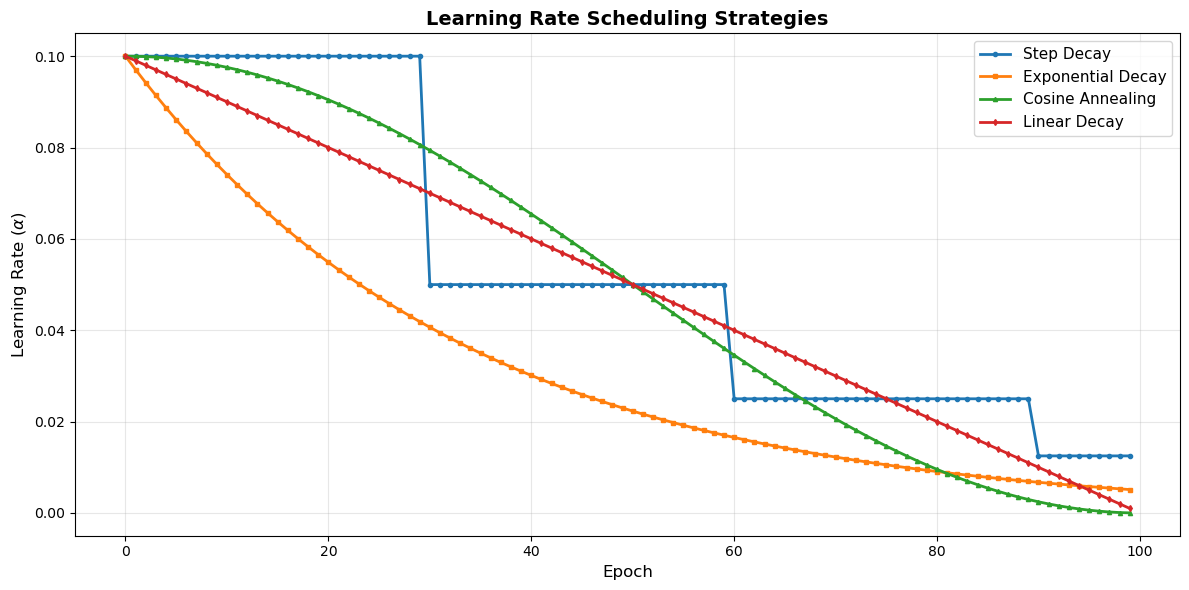

Strategy Characteristics:
✓ Step Decay: Sharp drops at fixed intervals
✓ Exponential Decay: Smooth, continuous decrease
✓ Cosine Annealing: Gentle decrease, then stabilizes
✓ Linear Decay: Simple, proportional to progress


In [3]:
# Visualization 2: Learning Rate Scheduling Strategies
def visualize_scheduling():
    """Compare different learning rate scheduling strategies"""
    epochs = 100
    alpha_0 = 0.1  # initial learning rate
    
    # Different scheduling strategies
    epoch_range = np.arange(epochs)
    
    # Step Decay: divide by 2 every 30 epochs
    step_decay = alpha_0 * (0.5 ** (epoch_range // 30))
    
    # Exponential Decay
    exponential_decay = alpha_0 * np.exp(-0.03 * epoch_range)
    
    # Cosine Annealing
    cosine_annealing = alpha_0 * 0.5 * (1 + np.cos(np.pi * epoch_range / epochs))
    
    # Linear Decay
    linear_decay = alpha_0 * (1 - epoch_range / epochs)
    
    plt.figure(figsize=(12, 6))
    plt.plot(epoch_range, step_decay, 'o-', linewidth=2, label='Step Decay', markersize=3)
    plt.plot(epoch_range, exponential_decay, 's-', linewidth=2, label='Exponential Decay', markersize=3)
    plt.plot(epoch_range, cosine_annealing, '^-', linewidth=2, label='Cosine Annealing', markersize=3)
    plt.plot(epoch_range, linear_decay, 'd-', linewidth=2, label='Linear Decay', markersize=3)
    
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Learning Rate ($\\alpha$)', fontsize=12)
    plt.title('Learning Rate Scheduling Strategies', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("Strategy Characteristics:")
    print("✓ Step Decay: Sharp drops at fixed intervals")
    print("✓ Exponential Decay: Smooth, continuous decrease")
    print("✓ Cosine Annealing: Gentle decrease, then stabilizes")
    print("✓ Linear Decay: Simple, proportional to progress")

visualize_scheduling()

---

## 3. Why Adaptive Learning Rates Exist

### The Core Problem: Sparse vs Dense Features

Different features learn at different speeds:
- **Dense features**: appear in every sample → large, frequent gradients
- **Sparse features**: appear rarely → small, infrequent gradients

**With standard GD**:
- Dense features dominate learning
- Sparse features barely update

**Solution**: Adaptive algorithms adjust the learning rate **per parameter**

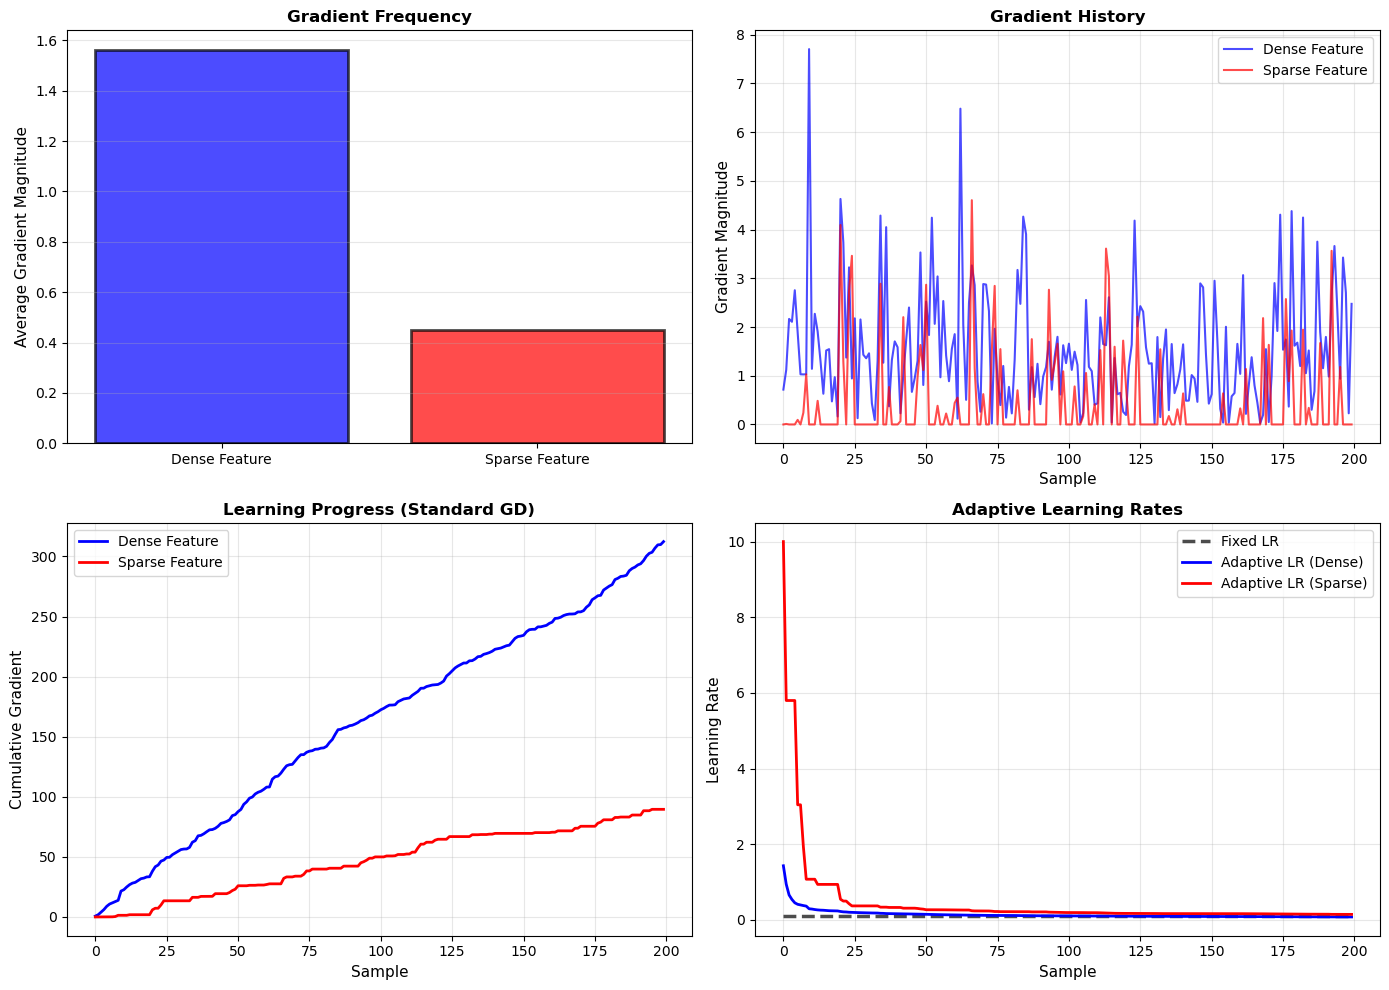

Key Insight:
✓ Dense feature: High gradients → Benefits from smaller LR
✓ Sparse feature: Low gradients → Benefits from larger LR
✓ Adaptive methods give each feature its own learning rate!


In [4]:
# Visualization 3: Sparse vs Dense Features Problem
def visualize_sparse_dense():
    """Demonstrate the sparse vs dense feature problem"""
    np.random.seed(42)
    
    # Simulate training data
    n_samples = 200
    
    # Dense feature: appears in every sample
    dense_feature = np.random.randn(n_samples) * 0.5
    dense_gradients = np.abs(np.random.randn(n_samples) * 2)  # Large gradients
    
    # Sparse feature: appears rarely (30% of time)
    sparse_gradients = []
    for _ in range(n_samples):
        if np.random.rand() < 0.3:  # 30% sparse
            sparse_gradients.append(np.random.randn() * 2)
        else:
            sparse_gradients.append(0)
    sparse_gradients = np.array(np.abs(sparse_gradients))
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Gradient magnitudes
    axes[0, 0].bar(['Dense Feature', 'Sparse Feature'], 
                   [np.mean(dense_gradients), np.mean(sparse_gradients)],
                   color=['blue', 'red'], alpha=0.7, edgecolor='black', linewidth=2)
    axes[0, 0].set_ylabel('Average Gradient Magnitude', fontsize=11)
    axes[0, 0].set_title('Gradient Frequency', fontsize=12, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Plot 2: Gradient history over time
    axes[0, 1].plot(dense_gradients, 'b-', linewidth=1.5, label='Dense Feature', alpha=0.7)
    axes[0, 1].plot(sparse_gradients, 'r-', linewidth=1.5, label='Sparse Feature', alpha=0.7)
    axes[0, 1].set_xlabel('Sample', fontsize=11)
    axes[0, 1].set_ylabel('Gradient Magnitude', fontsize=11)
    axes[0, 1].set_title('Gradient History', fontsize=12, fontweight='bold')
    axes[0, 1].legend(fontsize=10)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Accumulated gradients (simulating standard GD)
    accumulated_dense = np.cumsum(dense_gradients)
    accumulated_sparse = np.cumsum(sparse_gradients)
    
    axes[1, 0].plot(accumulated_dense, 'b-', linewidth=2, label='Dense Feature')
    axes[1, 0].plot(accumulated_sparse, 'r-', linewidth=2, label='Sparse Feature')
    axes[1, 0].set_xlabel('Sample', fontsize=11)
    axes[1, 0].set_ylabel('Cumulative Gradient', fontsize=11)
    axes[1, 0].set_title('Learning Progress (Standard GD)', fontsize=12, fontweight='bold')
    axes[1, 0].legend(fontsize=10)
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 4: Learning rates with standard GD vs adaptive
    fixed_lr = np.ones(n_samples) * 0.1
    # Adaptive: inversely proportional to gradient history
    adaptive_dense = 0.1 / (np.sqrt(accumulated_dense / n_samples) + 0.01)
    adaptive_sparse = 0.1 / (np.sqrt(accumulated_sparse / n_samples) + 0.01)
    
    axes[1, 1].plot(fixed_lr, 'k--', linewidth=2.5, label='Fixed LR', alpha=0.7)
    axes[1, 1].plot(adaptive_dense, 'b-', linewidth=2, label='Adaptive LR (Dense)')
    axes[1, 1].plot(adaptive_sparse, 'r-', linewidth=2, label='Adaptive LR (Sparse)')
    axes[1, 1].set_xlabel('Sample', fontsize=11)
    axes[1, 1].set_ylabel('Learning Rate', fontsize=11)
    axes[1, 1].set_title('Adaptive Learning Rates', fontsize=12, fontweight='bold')
    axes[1, 1].legend(fontsize=10)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("Key Insight:")
    print(f"✓ Dense feature: High gradients → Benefits from smaller LR")
    print(f"✓ Sparse feature: Low gradients → Benefits from larger LR")
    print(f"✓ Adaptive methods give each feature its own learning rate!")

visualize_sparse_dense()

---

## 4. AdaGrad (Adaptive Gradient Descent)

### What is AdaGrad?
AdaGrad adapts the learning rate **individually for each parameter** based on its gradient history.

### Key Idea
$$
\text{Large gradient history} \Rightarrow \text{Small learning rate}
$$
$$
\text{Small gradient history} \Rightarrow \text{Large learning rate}
$$

### AdaGrad Equations

**Accumulate squared gradients:**
$$
v_i^{(t)} = v_i^{(t-1)} + (g_i^{(t)})^2
$$

**Parameter update:**
$$
w_i^{(t+1)} = w_i^{(t)} - \frac{\alpha}{\sqrt{v_i^{(t)} + \epsilon}} g_i^{(t)}
$$

Where:
- $v_i$: accumulated gradient history
- $\epsilon$: small constant for numerical stability
- $\sqrt{v_i}$: scales the learning rate inversely

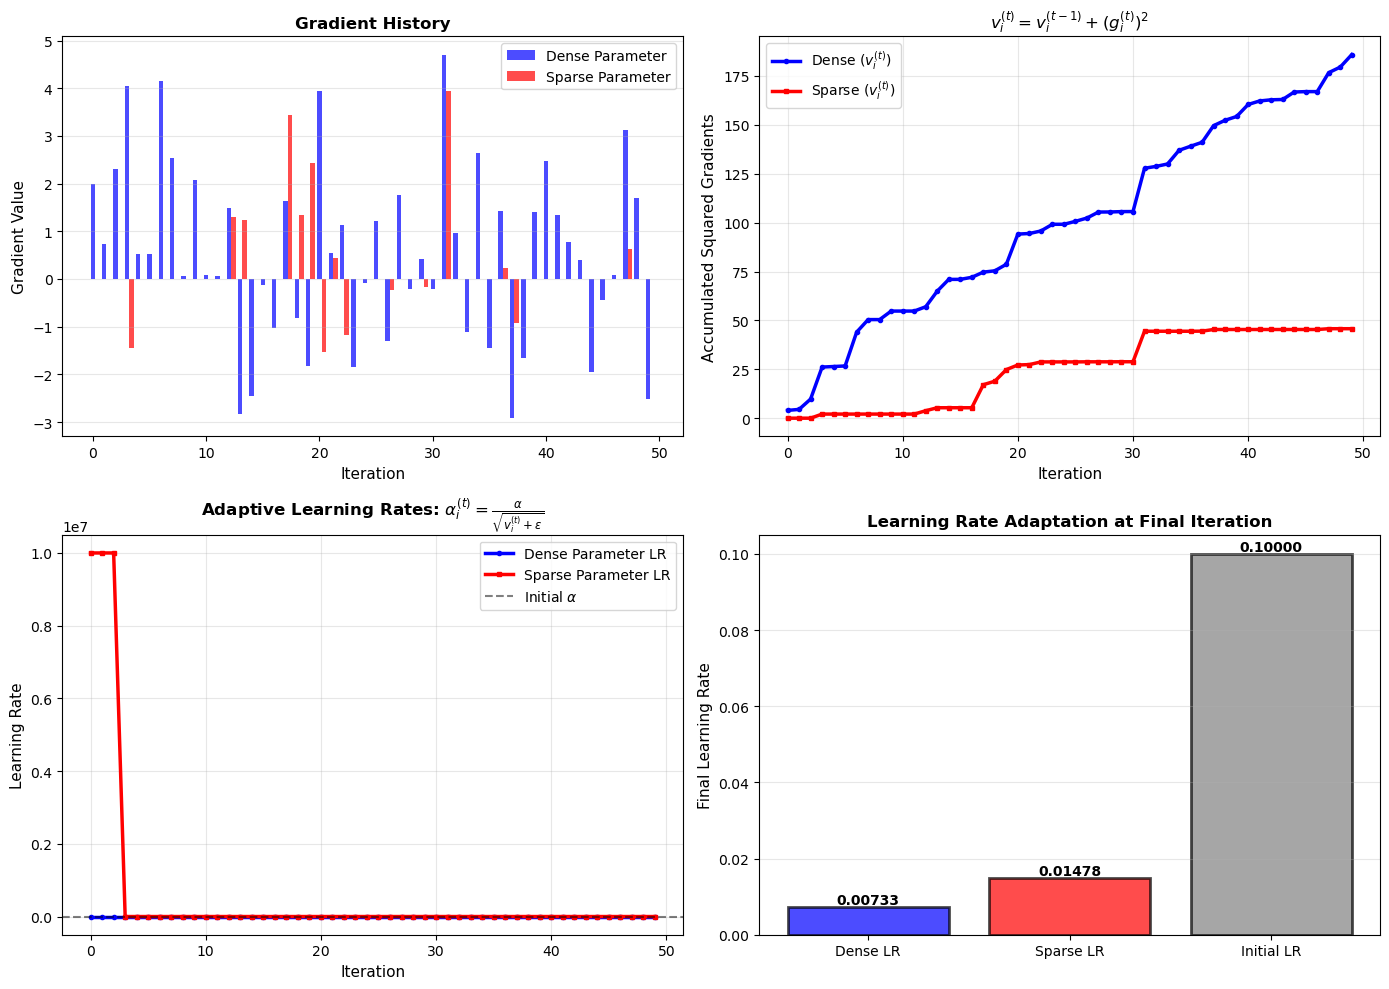

AdaGrad Behavior:
✓ Dense parameter: Initial LR = 0.1000 → Final LR = 0.00733 (↓ shrinks)
✓ Sparse parameter: Initial LR = 0.1000 → Final LR = 0.01478 (→ stays large)

➡️ This is why AdaGrad is great for sparse data!


In [5]:
# Visualization 4: How AdaGrad Works
def visualize_adagrad_mechanism():
    """Show how AdaGrad accumulates gradients and adapts learning rates"""
    np.random.seed(42)
    
    # Simulate 2 parameters with different gradient patterns
    iterations = 50
    
    # Parameter 1: Dense (frequent, large gradients)
    dense_grads = np.random.randn(iterations) * 2 + 1  # Mean=1, high variance
    
    # Parameter 2: Sparse (rare, small gradients)
    sparse_grads = np.zeros(iterations)
    sparse_indices = np.random.choice(iterations, size=15, replace=False)
    sparse_grads[sparse_indices] = np.random.randn(15) * 1.5
    
    # Compute AdaGrad quantities
    eps = 1e-8
    alpha = 0.1
    
    # Dense parameter
    v_dense = np.cumsum(dense_grads ** 2)
    lr_dense = alpha / (np.sqrt(v_dense) + eps)
    
    # Sparse parameter
    v_sparse = np.cumsum(sparse_grads ** 2)
    lr_sparse = alpha / (np.sqrt(v_sparse) + eps)
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Gradients
    x = np.arange(iterations)
    axes[0, 0].bar(x, dense_grads, alpha=0.7, label='Dense Parameter', color='blue', width=0.4)
    axes[0, 0].bar(x + 0.4, sparse_grads, alpha=0.7, label='Sparse Parameter', color='red', width=0.4)
    axes[0, 0].set_xlabel('Iteration', fontsize=11)
    axes[0, 0].set_ylabel('Gradient Value', fontsize=11)
    axes[0, 0].set_title('Gradient History', fontsize=12, fontweight='bold')
    axes[0, 0].legend(fontsize=10)
    axes[0, 0].grid(True, alpha=0.3, axis='y')
    
    # Plot 2: Accumulated squared gradients
    axes[0, 1].plot(v_dense, 'b-', linewidth=2.5, label='Dense ($v_i^{(t)}$)', marker='o', markersize=3)
    axes[0, 1].plot(v_sparse, 'r-', linewidth=2.5, label='Sparse ($v_i^{(t)}$)', marker='s', markersize=3)
    axes[0, 1].set_xlabel('Iteration', fontsize=11)
    axes[0, 1].set_ylabel('Accumulated Squared Gradients', fontsize=11)
    axes[0, 1].set_title('$v_i^{(t)} = v_i^{(t-1)} + (g_i^{(t)})^2$', fontsize=12, fontweight='bold')
    axes[0, 1].legend(fontsize=10)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Adaptive learning rates
    axes[1, 0].plot(lr_dense, 'b-', linewidth=2.5, label='Dense Parameter LR', marker='o', markersize=3)
    axes[1, 0].plot(lr_sparse, 'r-', linewidth=2.5, label='Sparse Parameter LR', marker='s', markersize=3)
    axes[1, 0].axhline(y=alpha, color='k', linestyle='--', alpha=0.5, label='Initial $\\alpha$')
    axes[1, 0].set_xlabel('Iteration', fontsize=11)
    axes[1, 0].set_ylabel('Learning Rate', fontsize=11)
    axes[1, 0].set_title('Adaptive Learning Rates: $\\alpha_i^{(t)} = \\frac{\\alpha}{\\sqrt{v_i^{(t)} + \\epsilon}}$', 
                         fontsize=12, fontweight='bold')
    axes[1, 0].legend(fontsize=10)
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 4: Key comparison
    final_comparison = {
        'Dense LR': lr_dense[-1],
        'Sparse LR': lr_sparse[-1],
        'Initial LR': alpha
    }
    colors_comp = ['blue', 'red', 'gray']
    bars = axes[1, 1].bar(final_comparison.keys(), final_comparison.values(), color=colors_comp, alpha=0.7, edgecolor='black', linewidth=2)
    axes[1, 1].set_ylabel('Final Learning Rate', fontsize=11)
    axes[1, 1].set_title('Learning Rate Adaptation at Final Iteration', fontsize=12, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.5f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("AdaGrad Behavior:")
    print(f"✓ Dense parameter: Initial LR = {alpha:.4f} → Final LR = {lr_dense[-1]:.5f} (↓ shrinks)")
    print(f"✓ Sparse parameter: Initial LR = {alpha:.4f} → Final LR = {lr_sparse[-1]:.5f} (→ stays large)")
    print(f"\n➡️ This is why AdaGrad is great for sparse data!")

visualize_adagrad_mechanism()

---

## 5. The Problem with AdaGrad: Learning Rate Dies

### Why AdaGrad Fails Over Time

**Issue**: The accumulated gradient $v_i$ only **grows**, never shrinks.

**Consequence**: The learning rate $\frac{\alpha}{\sqrt{v_i}}$ **monotonically decreases** to zero.

**Result**: After many iterations, training essentially stops!

This is why AdaGrad is rarely used in deep neural networks.

### Solution: Moving Average Instead of Accumulation

Instead of summing ALL past gradients, keep only a **weighted average** of recent gradients:

$$
v_t = \beta v_{t-1} + (1 - \beta) g_t^2
$$

This is the idea behind **RMSProp**!

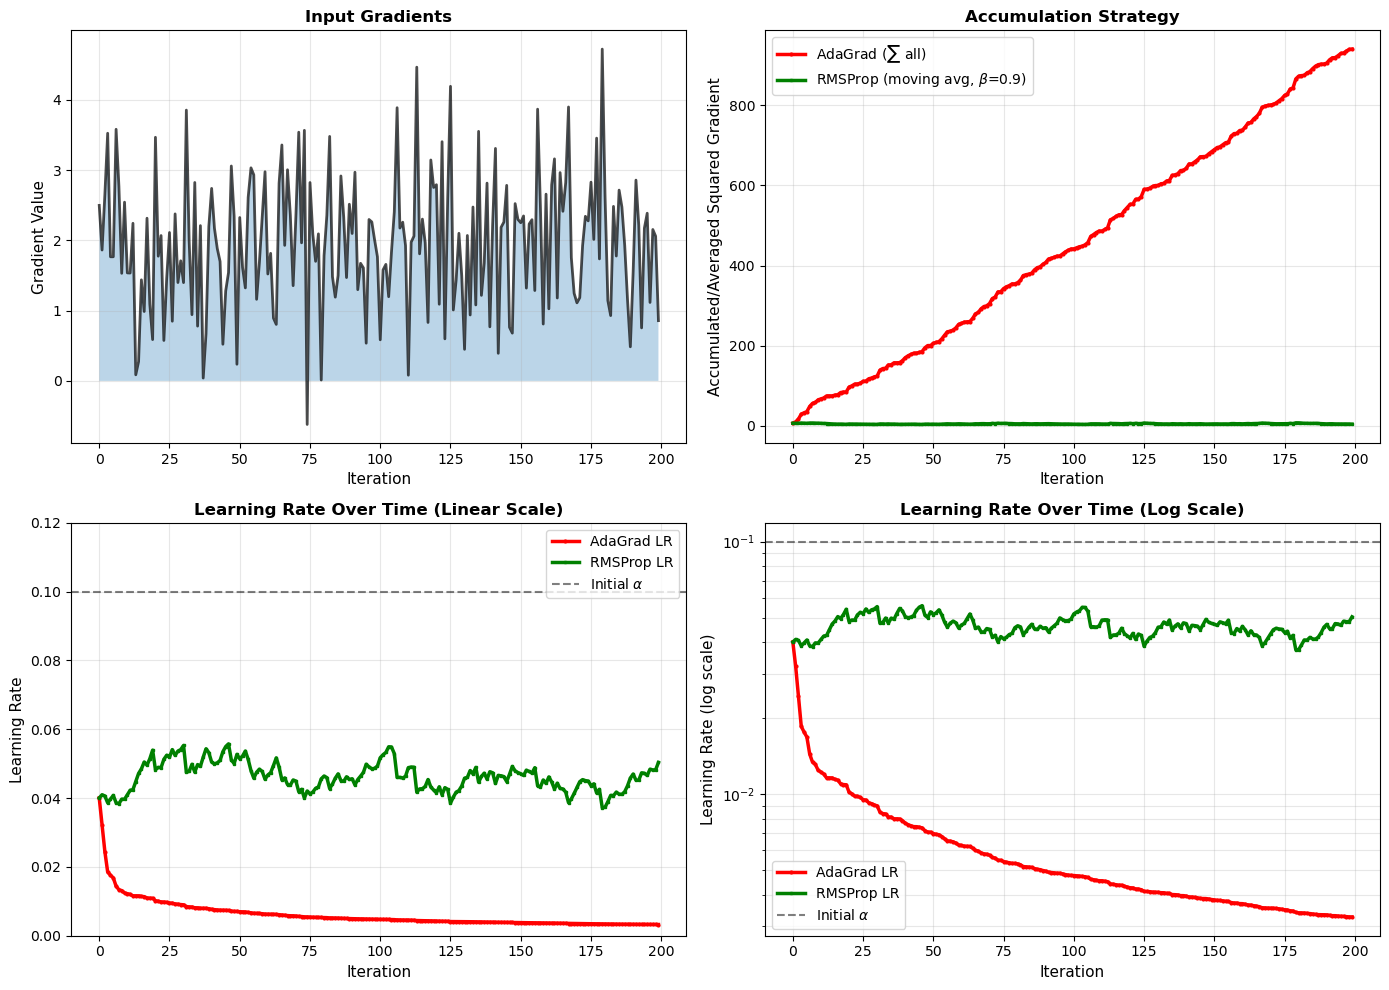

Key Difference:
✗ AdaGrad: LR at iteration 50 = 0.006975, at iteration 200 = 3.261289e-03
  → Learning rate **dies to zero** (exponential decay)

✓ RMSProp: LR at iteration 50 = 0.051426, at iteration 200 = 0.050353
  → Learning rate **stabilizes** and stays useful!


In [6]:
# Visualization 5: AdaGrad vs RMSProp
def visualize_adagrad_vs_rmsprop():
    """Show how RMSProp fixes AdaGrad's dying learning rate problem"""
    np.random.seed(42)
    
    iterations = 200
    alpha = 0.1
    eps = 1e-8
    beta = 0.9  # For RMSProp
    
    # Simulate constant, moderate gradients
    gradients = np.random.randn(iterations) * 1 + 2  # Mean=2
    
    # AdaGrad: accumulate all squared gradients
    v_adagrad = np.cumsum(gradients ** 2)
    lr_adagrad = alpha / (np.sqrt(v_adagrad) + eps)
    
    # RMSProp: exponential moving average
    v_rmsprop = np.zeros(iterations)
    v_rmsprop[0] = gradients[0] ** 2
    for t in range(1, iterations):
        v_rmsprop[t] = beta * v_rmsprop[t-1] + (1 - beta) * gradients[t] ** 2
    lr_rmsprop = alpha / (np.sqrt(v_rmsprop) + eps)
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Gradient history
    axes[0, 0].plot(gradients, 'k-', linewidth=2, alpha=0.7)
    axes[0, 0].fill_between(range(iterations), gradients, alpha=0.3)
    axes[0, 0].set_xlabel('Iteration', fontsize=11)
    axes[0, 0].set_ylabel('Gradient Value', fontsize=11)
    axes[0, 0].set_title('Input Gradients', fontsize=12, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot 2: Accumulated vs Moving Average
    axes[0, 1].plot(v_adagrad, 'r-', linewidth=2.5, label='AdaGrad ($\\sum$ all)', marker='o', markersize=2)
    axes[0, 1].plot(v_rmsprop, 'g-', linewidth=2.5, label='RMSProp (moving avg, $\\beta$=0.9)', marker='s', markersize=2)
    axes[0, 1].set_xlabel('Iteration', fontsize=11)
    axes[0, 1].set_ylabel('Accumulated/Averaged Squared Gradient', fontsize=11)
    axes[0, 1].set_title('Accumulation Strategy', fontsize=12, fontweight='bold')
    axes[0, 1].legend(fontsize=10)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Learning rates comparison (LINEAR SCALE)
    axes[1, 0].plot(lr_adagrad, 'r-', linewidth=2.5, label='AdaGrad LR', marker='o', markersize=2)
    axes[1, 0].plot(lr_rmsprop, 'g-', linewidth=2.5, label='RMSProp LR', marker='s', markersize=2)
    axes[1, 0].axhline(y=alpha, color='k', linestyle='--', alpha=0.5, linewidth=1.5, label='Initial $\\alpha$')
    axes[1, 0].set_xlabel('Iteration', fontsize=11)
    axes[1, 0].set_ylabel('Learning Rate', fontsize=11)
    axes[1, 0].set_title('Learning Rate Over Time (Linear Scale)', fontsize=12, fontweight='bold')
    axes[1, 0].legend(fontsize=10)
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].set_ylim([0, alpha * 1.2])
    
    # Plot 4: Learning rates comparison (LOG SCALE)
    axes[1, 1].semilogy(lr_adagrad, 'r-', linewidth=2.5, label='AdaGrad LR', marker='o', markersize=2)
    axes[1, 1].semilogy(lr_rmsprop, 'g-', linewidth=2.5, label='RMSProp LR', marker='s', markersize=2)
    axes[1, 1].axhline(y=alpha, color='k', linestyle='--', alpha=0.5, linewidth=1.5, label='Initial $\\alpha$')
    axes[1, 1].set_xlabel('Iteration', fontsize=11)
    axes[1, 1].set_ylabel('Learning Rate (log scale)', fontsize=11)
    axes[1, 1].set_title('Learning Rate Over Time (Log Scale)', fontsize=12, fontweight='bold')
    axes[1, 1].legend(fontsize=10)
    axes[1, 1].grid(True, alpha=0.3, which='both')
    
    plt.tight_layout()
    plt.show()
    
    print("Key Difference:")
    print(f"✗ AdaGrad: LR at iteration 50 = {lr_adagrad[50]:.6f}, at iteration 200 = {lr_adagrad[-1]:.6e}")
    print(f"  → Learning rate **dies to zero** (exponential decay)")
    print(f"\n✓ RMSProp: LR at iteration 50 = {lr_rmsprop[50]:.6f}, at iteration 200 = {lr_rmsprop[-1]:.6f}")
    print(f"  → Learning rate **stabilizes** and stays useful!")

visualize_adagrad_vs_rmsprop()

---

## 6. RMSProp (Root Mean Square Propagation)

### Core Idea: Exponential Moving Average

Replace accumulation with a **weighted average** of recent gradients:

$$
v_t = \beta v_{t-1} + (1 - \beta) g_t^2
$$

**Interpretation**:
- $\beta$: how much to "remember" the past (typically 0.9)
- Recent gradients get **higher weight**
- Old gradients **fade exponentially**

### RMSProp Update Rule

$$
w_{t+1} = w_t - \frac{\alpha}{\sqrt{v_t + \epsilon}} g_t
$$

**Key difference from AdaGrad**: $v_t$ doesn't monotonically grow → learning rate stays stable!

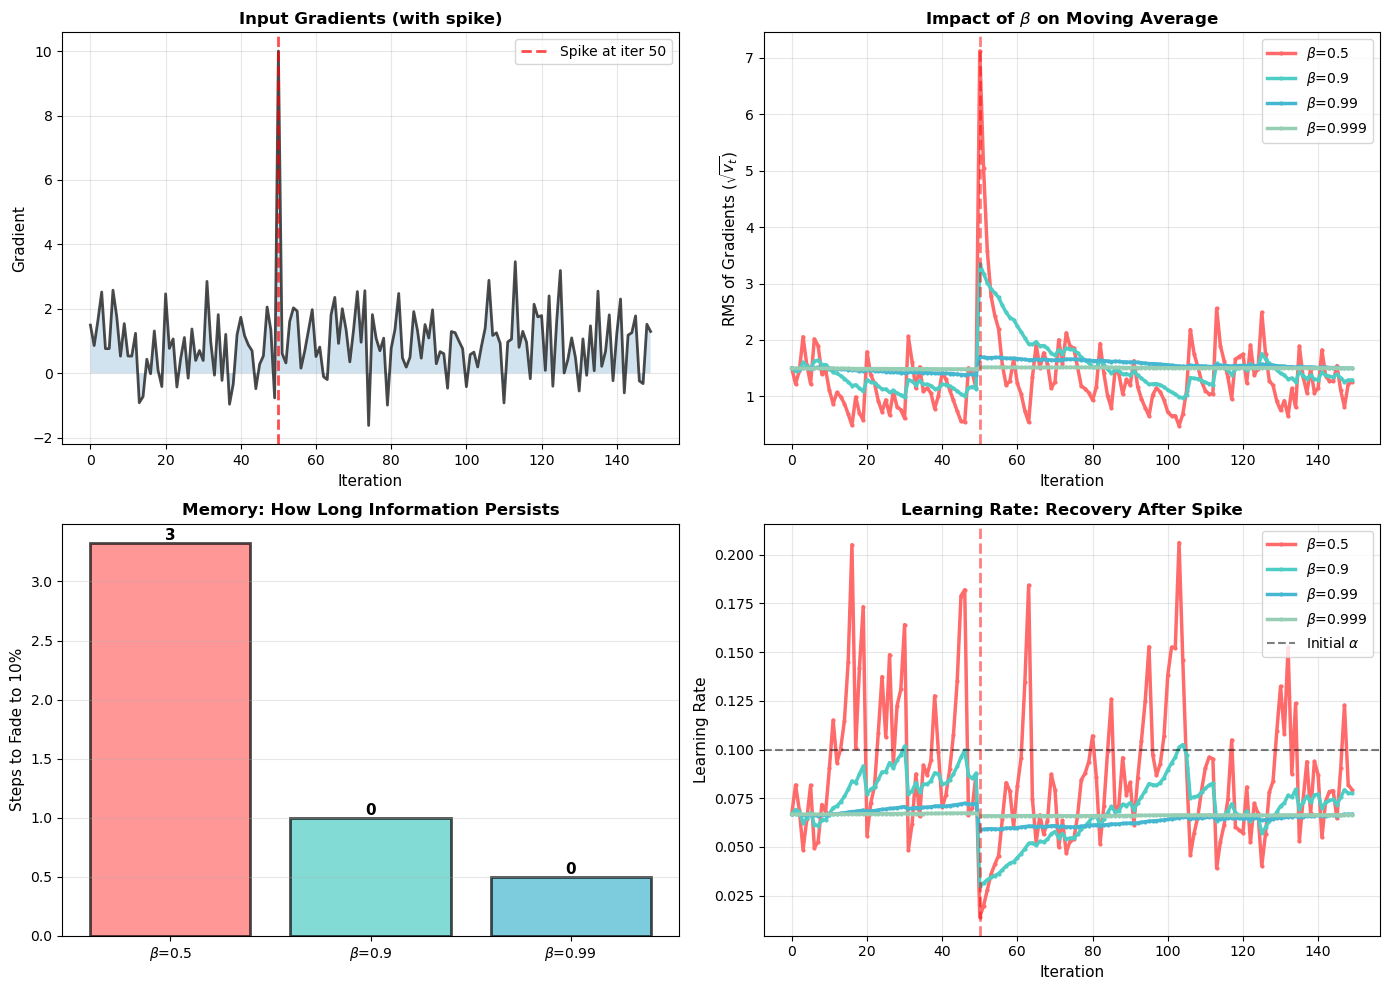

Effect of $\beta$ in RMSProp:
✓ Small $\beta$ (0.5): Quick recovery, forgets old spikes fast
✓ Medium $\beta$ (0.9): Balance between stability and responsiveness
✓ Large $\beta$ (0.99+): Long memory, slow to react to new information


In [7]:
# Visualization 6: Effect of Beta in RMSProp
def visualize_beta_effect():
    """Show how different beta values affect moving average in RMSProp"""
    np.random.seed(42)
    
    iterations = 150
    
    # Simulate gradients: sudden spike at iteration 50
    gradients = np.random.randn(iterations) * 1 + 1
    gradients[50] = 10  # Big spike!
    
    betas = [0.5, 0.9, 0.99, 0.999]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
    eps = 1e-8
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Input gradients with spike
    axes[0, 0].plot(gradients, 'k-', linewidth=2, alpha=0.7)
    axes[0, 0].fill_between(range(iterations), gradients, alpha=0.2)
    axes[0, 0].axvline(x=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Spike at iter 50')
    axes[0, 0].set_xlabel('Iteration', fontsize=11)
    axes[0, 0].set_ylabel('Gradient', fontsize=11)
    axes[0, 0].set_title('Input Gradients (with spike)', fontsize=12, fontweight='bold')
    axes[0, 0].legend(fontsize=10)
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot 2: Effect of different betas
    for beta, color in zip(betas, colors):
        v = np.zeros(iterations)
        v[0] = gradients[0] ** 2
        for t in range(1, iterations):
            v[t] = beta * v[t-1] + (1 - beta) * gradients[t] ** 2
        
        axes[0, 1].plot(np.sqrt(v), linewidth=2.5, label=f'$\\beta$={beta}', color=color, marker='o', markersize=2)
    
    axes[0, 1].axvline(x=50, color='red', linestyle='--', linewidth=2, alpha=0.5)
    axes[0, 1].set_xlabel('Iteration', fontsize=11)
    axes[0, 1].set_ylabel('RMS of Gradients ($\\sqrt{v_t}$)', fontsize=11)
    axes[0, 1].set_title('Impact of $\\beta$ on Moving Average', fontsize=12, fontweight='bold')
    axes[0, 1].legend(fontsize=10)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Memory influence visualization
    beta_values = [0.5, 0.9, 0.99]
    memory_steps = []
    
    for beta in beta_values:
        # Calculate how many steps it takes for old value to fade to 10% (0.1)
        # (1-beta)^n = 0.1 → n = log(0.1) / log(1-beta)
        steps_to_fade = np.log(0.1) / np.log(1 - beta) if beta < 1 else float('inf')
        memory_steps.append(steps_to_fade)
    
    bars = axes[1, 0].bar([f'$\\beta$={b}' for b in beta_values], memory_steps, 
                          color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.7, edgecolor='black', linewidth=2)
    axes[1, 0].set_ylabel('Steps to Fade to 10%', fontsize=11)
    axes[1, 0].set_title('Memory: How Long Information Persists', fontsize=12, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3, axis='y')
    
    for bar in bars:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Plot 4: Learning rates with different betas
    alpha = 0.1
    for beta, color in zip(betas, colors):
        v = np.zeros(iterations)
        v[0] = gradients[0] ** 2
        for t in range(1, iterations):
            v[t] = beta * v[t-1] + (1 - beta) * gradients[t] ** 2
        
        lr = alpha / (np.sqrt(v) + eps)
        axes[1, 1].plot(lr, linewidth=2.5, label=f'$\\beta$={beta}', color=color, marker='o', markersize=2)
    
    axes[1, 1].axhline(y=alpha, color='k', linestyle='--', alpha=0.5, linewidth=1.5, label='Initial $\\alpha$')
    axes[1, 1].axvline(x=50, color='red', linestyle='--', linewidth=2, alpha=0.5)
    axes[1, 1].set_xlabel('Iteration', fontsize=11)
    axes[1, 1].set_ylabel('Learning Rate', fontsize=11)
    axes[1, 1].set_title('Learning Rate: Recovery After Spike', fontsize=12, fontweight='bold')
    axes[1, 1].legend(fontsize=10)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("Effect of $\\beta$ in RMSProp:")
    print(f"✓ Small $\\beta$ (0.5): Quick recovery, forgets old spikes fast")
    print(f"✓ Medium $\\beta$ (0.9): Balance between stability and responsiveness")
    print(f"✓ Large $\\beta$ (0.99+): Long memory, slow to react to new information")

visualize_beta_effect()

---

## 7. Momentum: Adding Direction Memory

### The Idea of Momentum

Instead of just using the current gradient, remember the **direction** you've been moving:

$$
m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t
$$

**Intuition**: Like a ball rolling downhill that builds up speed!

### Why Momentum Helps
- **Smooths oscillations**: Averages gradients over recent history
- **Accelerates in consistent directions**: Fast convergence
- **Dampens noisy updates**: More stable training

### Momentum in Action

$$
w_{t+1} = w_t - \alpha m_t
$$

Instead of stepping in the direction of the **current gradient**, step in the direction of the **accumulated momentum**.

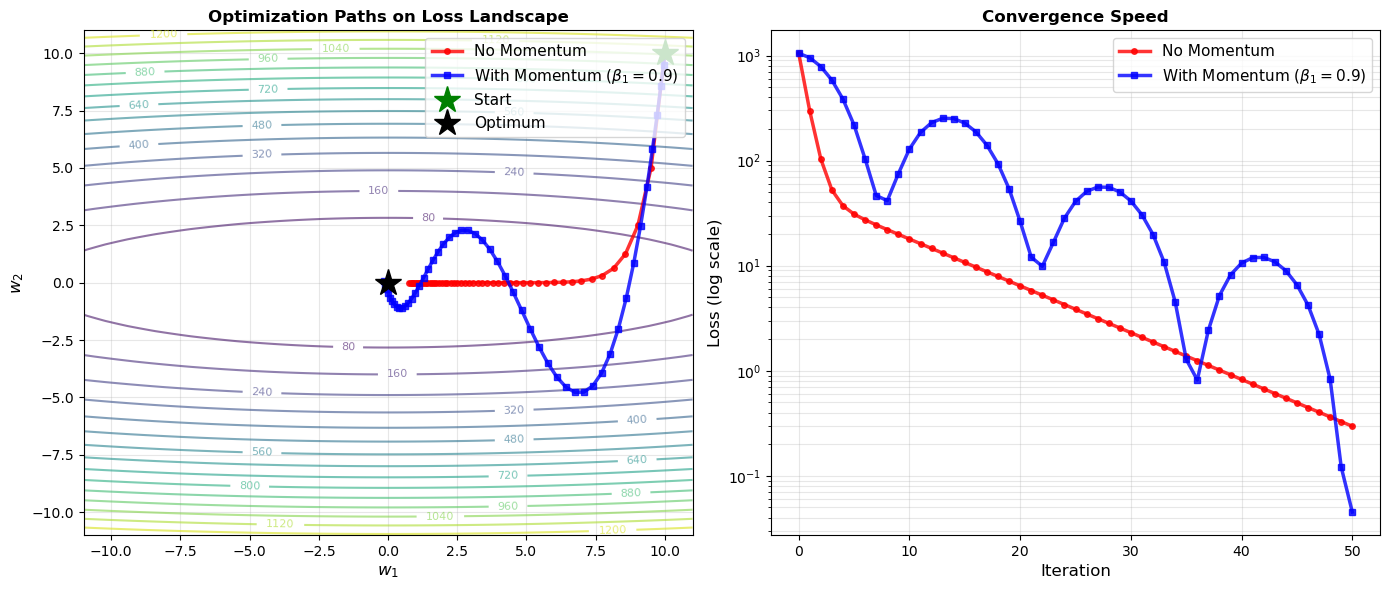

Momentum Benefits:
✓ Without momentum: 51 steps to convergence
✓ With momentum: 51 steps to convergence
✓ Momentum shows smoother, faster convergence in elongated landscapes!


In [8]:
# Visualization 7: Momentum vs No Momentum
def visualize_momentum():
    """Compare gradient descent with and without momentum"""
    
    # Define a simple 2D quadratic function with different curvature
    def loss_function(x, y):
        return 0.5*x**2 + 10*y**2
    
    def gradient(x, y):
        return np.array([x, 10*y])
    
    # Starting point
    w = np.array([10.0, 10.0])
    alpha = 0.05
    beta_momentum = 0.9
    eps = 1e-8
    
    # GD without momentum
    w_no_momentum = w.copy()
    path_no_momentum = [w_no_momentum.copy()]
    
    for _ in range(50):
        g = gradient(w_no_momentum[0], w_no_momentum[1])
        w_no_momentum = w_no_momentum - alpha * g
        path_no_momentum.append(w_no_momentum.copy())
    
    # GD with momentum
    w_momentum = w.copy()
    path_momentum = [w_momentum.copy()]
    m = np.zeros_like(w)
    
    for _ in range(50):
        g = gradient(w_momentum[0], w_momentum[1])
        m = beta_momentum * m + (1 - beta_momentum) * g
        w_momentum = w_momentum - alpha * m
        path_momentum.append(w_momentum.copy())
    
    path_no_momentum = np.array(path_no_momentum)
    path_momentum = np.array(path_momentum)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Contour plot with optimization paths
    x_range = np.linspace(-11, 11, 100)
    y_range = np.linspace(-11, 11, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = loss_function(X, Y)
    
    # Contour plot
    contours = axes[0].contour(X, Y, Z, levels=15, cmap='viridis', alpha=0.6)
    axes[0].clabel(contours, inline=True, fontsize=8)
    
    # Plot paths
    axes[0].plot(path_no_momentum[:, 0], path_no_momentum[:, 1], 'o-', 
                linewidth=2.5, markersize=4, label='No Momentum', color='red', alpha=0.8)
    axes[0].plot(path_momentum[:, 0], path_momentum[:, 1], 's-', 
                linewidth=2.5, markersize=4, label='With Momentum ($\\beta_1=0.9$)', color='blue', alpha=0.8)
    
    # Mark start and end
    axes[0].plot(w[0], w[1], '*', markersize=20, color='green', label='Start', zorder=5)
    axes[0].plot(0, 0, '*', markersize=20, color='black', label='Optimum', zorder=5)
    
    axes[0].set_xlabel('$w_1$', fontsize=12)
    axes[0].set_ylabel('$w_2$', fontsize=12)
    axes[0].set_title('Optimization Paths on Loss Landscape', fontsize=12, fontweight='bold')
    axes[0].legend(fontsize=11, loc='upper right')
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Loss over iterations
    loss_no_momentum = [loss_function(path_no_momentum[i, 0], path_no_momentum[i, 1]) for i in range(len(path_no_momentum))]
    loss_momentum = [loss_function(path_momentum[i, 0], path_momentum[i, 1]) for i in range(len(path_momentum))]
    
    axes[1].semilogy(loss_no_momentum, 'o-', linewidth=2.5, markersize=4, 
                    label='No Momentum', color='red', alpha=0.8)
    axes[1].semilogy(loss_momentum, 's-', linewidth=2.5, markersize=4, 
                    label='With Momentum ($\\beta_1=0.9$)', color='blue', alpha=0.8)
    
    axes[1].set_xlabel('Iteration', fontsize=12)
    axes[1].set_ylabel('Loss (log scale)', fontsize=12)
    axes[1].set_title('Convergence Speed', fontsize=12, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3, which='both')
    
    plt.tight_layout()
    plt.show()
    
    print("Momentum Benefits:")
    print(f"✓ Without momentum: {len(loss_no_momentum)} steps to convergence")
    print(f"✓ With momentum: {len(loss_momentum)} steps to convergence")
    print(f"✓ Momentum shows smoother, faster convergence in elongated landscapes!")

visualize_momentum()

---

## 8. Adam: Combining Momentum + Adaptive Learning Rates

### What is Adam?

Adam = **Ad**aptive **M**oment Estimation

It combines TWO concepts:
1. **Momentum** ($m_t$): remembers the direction
2. **RMSProp** ($v_t$): adapts per-parameter learning rates

### Adam Equations

**First moment (momentum):**
$$
m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t
$$

**Second moment (adaptive rates):**
$$
v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2
$$

**Bias correction** (important in early steps):
$$
\hat{m}_t = \frac{m_t}{1-\beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1-\beta_2^t}
$$

**Update:**
$$
w_{t+1} = w_t - \frac{\alpha}{\sqrt{\hat{v}_t + \epsilon}} \hat{m}_t
$$

### Default Hyperparameters
- $\alpha = 0.001$ (learning rate)
- $\beta_1 = 0.9$ (momentum decay)
- $\beta_2 = 0.999$ (RMSProp decay)
- $\epsilon = 10^{-8}$ (numerical stability)

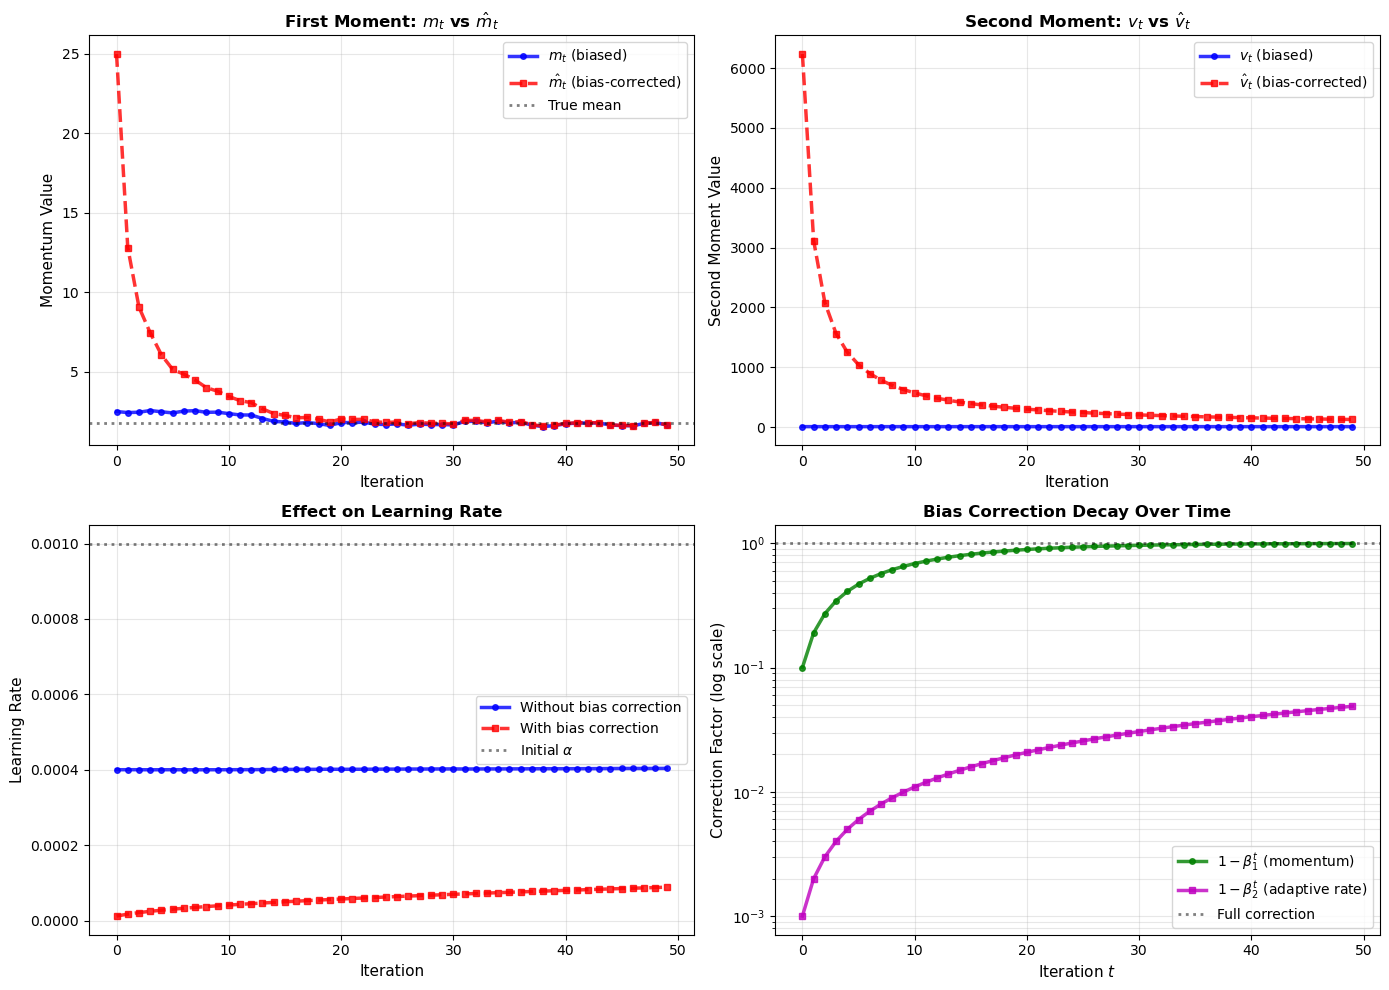

Bias Correction Insight:
✓ Iteration 1: Without correction → biased estimates
✓ Iteration 1: With correction → accurate estimates
✓ Later iterations: Correction factor → 1, both versions converge

➡️ Bias correction is crucial in the **first few iterations**!


In [9]:
# Visualization 8: Bias Correction in Adam
def visualize_bias_correction():
    """Show why bias correction matters in early training steps"""
    np.random.seed(42)
    
    iterations = 50
    beta1 = 0.9
    beta2 = 0.999
    
    # Simulate gradients
    gradients = np.random.randn(iterations) + 2
    
    # Compute first moment (momentum)
    m = np.zeros(iterations)
    m[0] = gradients[0]
    for t in range(1, iterations):
        m[t] = beta1 * m[t-1] + (1 - beta1) * gradients[t]
    
    # Compute second moment
    v = np.zeros(iterations)
    v[0] = gradients[0] ** 2
    for t in range(1, iterations):
        v[t] = beta2 * v[t-1] + (1 - beta2) * gradients[t] ** 2
    
    # Bias-corrected versions
    m_hat = np.zeros(iterations)
    v_hat = np.zeros(iterations)
    for t in range(iterations):
        m_hat[t] = m[t] / (1 - beta1 ** (t + 1))
        v_hat[t] = v[t] / (1 - beta2 ** (t + 1))
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: First moment (momentum)
    axes[0, 0].plot(m, 'b-', linewidth=2.5, marker='o', markersize=4, label='$m_t$ (biased)', alpha=0.8)
    axes[0, 0].plot(m_hat, 'r--', linewidth=2.5, marker='s', markersize=4, label='$\\hat{m}_t$ (bias-corrected)', alpha=0.8)
    axes[0, 0].axhline(y=np.mean(gradients), color='k', linestyle=':', linewidth=2, alpha=0.5, label='True mean')
    axes[0, 0].set_xlabel('Iteration', fontsize=11)
    axes[0, 0].set_ylabel('Momentum Value', fontsize=11)
    axes[0, 0].set_title('First Moment: $m_t$ vs $\\hat{m}_t$', fontsize=12, fontweight='bold')
    axes[0, 0].legend(fontsize=10)
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot 2: Second moment
    axes[0, 1].plot(v, 'b-', linewidth=2.5, marker='o', markersize=4, label='$v_t$ (biased)', alpha=0.8)
    axes[0, 1].plot(v_hat, 'r--', linewidth=2.5, marker='s', markersize=4, label='$\\hat{v}_t$ (bias-corrected)', alpha=0.8)
    axes[0, 1].set_xlabel('Iteration', fontsize=11)
    axes[0, 1].set_ylabel('Second Moment Value', fontsize=11)
    axes[0, 1].set_title('Second Moment: $v_t$ vs $\\hat{v}_t$', fontsize=12, fontweight='bold')
    axes[0, 1].legend(fontsize=10)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Learning rates (with and without bias correction)
    alpha = 0.001
    eps = 1e-8
    
    lr_biased = alpha / (np.sqrt(v) + eps)
    lr_corrected = alpha / (np.sqrt(v_hat) + eps)
    
    axes[1, 0].plot(lr_biased, 'b-', linewidth=2.5, marker='o', markersize=4, label='Without bias correction', alpha=0.8)
    axes[1, 0].plot(lr_corrected, 'r--', linewidth=2.5, marker='s', markersize=4, label='With bias correction', alpha=0.8)
    axes[1, 0].axhline(y=alpha, color='k', linestyle=':', linewidth=2, alpha=0.5, label='Initial $\\alpha$')
    axes[1, 0].set_xlabel('Iteration', fontsize=11)
    axes[1, 0].set_ylabel('Learning Rate', fontsize=11)
    axes[1, 0].set_title('Effect on Learning Rate', fontsize=12, fontweight='bold')
    axes[1, 0].legend(fontsize=10)
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 4: Bias correction factor
    bias_correction_1 = 1 - beta1 ** np.arange(1, iterations + 1)
    bias_correction_2 = 1 - beta2 ** np.arange(1, iterations + 1)
    
    axes[1, 1].semilogy(bias_correction_1, 'g-', linewidth=2.5, marker='o', markersize=4, 
                        label='$1 - \\beta_1^t$ (momentum)', alpha=0.8)
    axes[1, 1].semilogy(bias_correction_2, 'm-', linewidth=2.5, marker='s', markersize=4, 
                        label='$1 - \\beta_2^t$ (adaptive rate)', alpha=0.8)
    axes[1, 1].axhline(y=1, color='k', linestyle=':', linewidth=2, alpha=0.5, label='Full correction')
    axes[1, 1].set_xlabel('Iteration $t$', fontsize=11)
    axes[1, 1].set_ylabel('Correction Factor (log scale)', fontsize=11)
    axes[1, 1].set_title('Bias Correction Decay Over Time', fontsize=12, fontweight='bold')
    axes[1, 1].legend(fontsize=10)
    axes[1, 1].grid(True, alpha=0.3, which='both')
    
    plt.tight_layout()
    plt.show()
    
    print("Bias Correction Insight:")
    print(f"✓ Iteration 1: Without correction → biased estimates")
    print(f"✓ Iteration 1: With correction → accurate estimates")
    print(f"✓ Later iterations: Correction factor → 1, both versions converge")
    print(f"\n➡️ Bias correction is crucial in the **first few iterations**!")

visualize_bias_correction()

---

## 9. Comparison: Gradient Descent vs RMSProp vs Adam

### Summary of Optimizer Behaviors

| Aspect | Plain GD | RMSProp | Adam |
|--------|----------|---------|------|
| **Learning Rate** | Fixed | Adapts per param | Adapts per param |
| **Direction Memory** | None | None | Momentum (biased) |
| **Sparse Features** | ❌ Poor | ✅ Good | ✅ Excellent |
| **Convergence Speed** | Slow | Fast | Very Fast |
| **Stability** | Unstable | Stable | Very Stable |
| **Typical $\alpha$** | 0.01-0.1 | 0.001-0.01 | 0.001 |
| **Use Case** | Simple problems | Modern ML | Deep Learning |

### When to Use What?
- **Simple convex optimization**: Gradient Descent + LR scheduling
- **Sparse data, classical ML**: RMSProp
- **Deep Learning (default choice)**: **Adam**

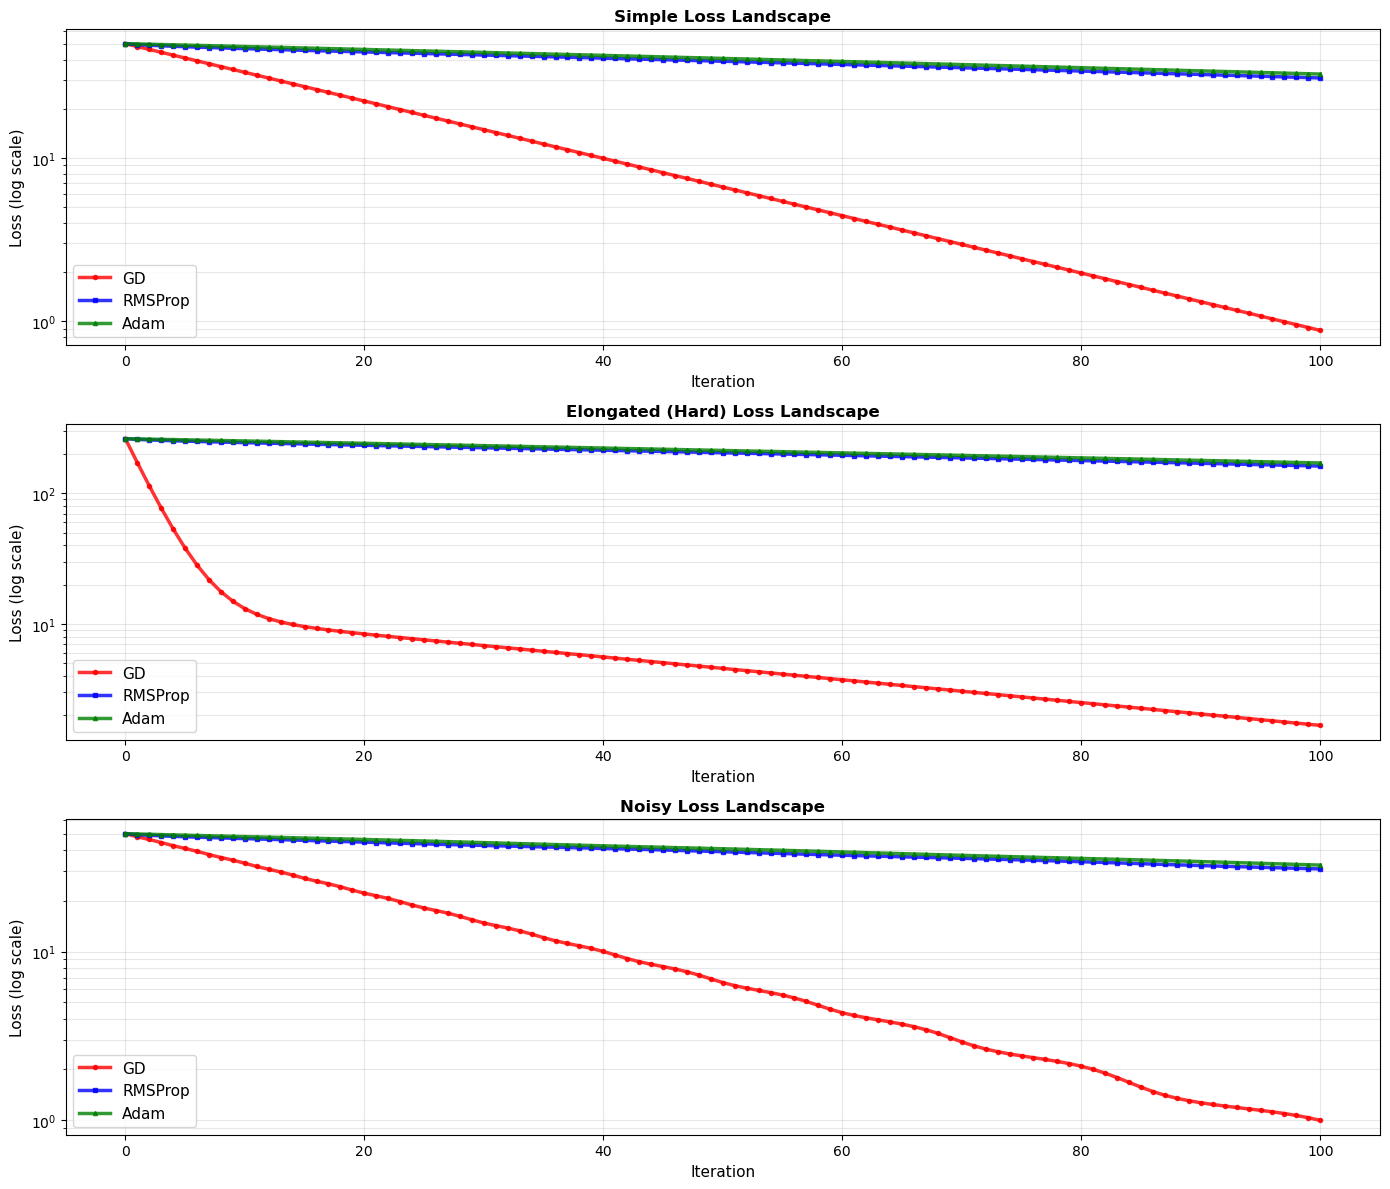

Optimizer Performance Summary:
✓ Simple landscape: All converge similarly
✓ Elongated landscape: RMSProp and Adam outperform GD
✓ Noisy landscape: Adam handles noise better than GD and RMSProp


In [10]:
# Visualization 9: Optimizer Comparison on Different Landscapes
def compare_optimizers():
    """Compare GD, RMSProp, and Adam on different loss landscapes"""
    
    np.random.seed(42)
    
    # Loss functions with different characteristics
    def loss_simple(x, y):
        return x**2 + y**2
    
    def loss_elongated(x, y):
        return 0.5*x**2 + 10*y**2  # Different curvature
    
    def loss_noisy(x, y):
        return x**2 + y**2 + 0.1*np.sin(10*x)*np.cos(10*y)  # Noisy
    
    def gd_step(w, alpha, loss_fn):
        eps = 1e-8
        grad_x = (loss_fn(w[0] + eps, w[1]) - loss_fn(w[0] - eps, w[1])) / (2*eps)
        grad_y = (loss_fn(w[0], w[1] + eps) - loss_fn(w[0], w[1] - eps)) / (2*eps)
        return w - alpha * np.array([grad_x, grad_y])
    
    def rmsprop_step(w, alpha, beta, v, loss_fn):
        eps = 1e-8
        grad_eps = 1e-8
        grad_x = (loss_fn(w[0] + grad_eps, w[1]) - loss_fn(w[0] - grad_eps, w[1])) / (2*grad_eps)
        grad_y = (loss_fn(w[0], w[1] + grad_eps) - loss_fn(w[0], w[1] - eps)) / (2*grad_eps)
        grad = np.array([grad_x, grad_y])
        
        v = beta * v + (1 - beta) * grad**2
        return w - alpha / (np.sqrt(v) + eps) * grad, v
    
    def adam_step(w, alpha, beta1, beta2, m, v, t, loss_fn):
        eps = 1e-8
        grad_eps = 1e-8
        grad_x = (loss_fn(w[0] + grad_eps, w[1]) - loss_fn(w[0] - grad_eps, w[1])) / (2*grad_eps)
        grad_y = (loss_fn(w[0], w[1] + grad_eps) - loss_fn(w[0], w[1] - grad_eps)) / (2*grad_eps)
        grad = np.array([grad_x, grad_y])
        
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        return w - alpha / (np.sqrt(v_hat) + eps) * m_hat, m, v
    
    loss_fns = [loss_simple, loss_elongated, loss_noisy]
    loss_names = ['Simple', 'Elongated (Hard)', 'Noisy']
    
    fig, axes = plt.subplots(3, 1, figsize=(14, 12))
    
    for idx, (loss_fn, loss_name) in enumerate(zip(loss_fns, loss_names)):
        iterations = 100
        w0 = np.array([5.0, 5.0])
        
        # GD
        w_gd = w0.copy()
        path_gd = [w_gd.copy()]
        for _ in range(iterations):
            w_gd = gd_step(w_gd, 0.01, loss_fn)
            path_gd.append(w_gd.copy())
        loss_gd = [loss_fn(path_gd[i][0], path_gd[i][1]) for i in range(len(path_gd))]
        
        # RMSProp
        w_rmsprop = w0.copy()
        v_rmsprop = np.zeros(2)
        path_rmsprop = [w_rmsprop.copy()]
        for _ in range(iterations):
            w_rmsprop, v_rmsprop = rmsprop_step(w_rmsprop, 0.01, 0.9, v_rmsprop, loss_fn)
            path_rmsprop.append(w_rmsprop.copy())
        loss_rmsprop = [loss_fn(path_rmsprop[i][0], path_rmsprop[i][1]) for i in range(len(path_rmsprop))]
        
        # Adam
        w_adam = w0.copy()
        m_adam = np.zeros(2)
        v_adam = np.zeros(2)
        path_adam = [w_adam.copy()]
        for t in range(1, iterations + 1):
            w_adam, m_adam, v_adam = adam_step(w_adam, 0.01, 0.9, 0.999, m_adam, v_adam, t, loss_fn)
            path_adam.append(w_adam.copy())
        loss_adam = [loss_fn(path_adam[i][0], path_adam[i][1]) for i in range(len(path_adam))]
        
        axes[idx].semilogy(loss_gd, 'r-', linewidth=2.5, marker='o', markersize=3, label='GD', alpha=0.8)
        axes[idx].semilogy(loss_rmsprop, 'b-', linewidth=2.5, marker='s', markersize=3, label='RMSProp', alpha=0.8)
        axes[idx].semilogy(loss_adam, 'g-', linewidth=2.5, marker='^', markersize=3, label='Adam', alpha=0.8)
        
        axes[idx].set_xlabel('Iteration', fontsize=11)
        axes[idx].set_ylabel('Loss (log scale)', fontsize=11)
        axes[idx].set_title(f'{loss_name} Loss Landscape', fontsize=12, fontweight='bold')
        axes[idx].legend(fontsize=11)
        axes[idx].grid(True, alpha=0.3, which='both')
    
    plt.tight_layout()
    plt.show()
    
    print("Optimizer Performance Summary:")
    print("✓ Simple landscape: All converge similarly")
    print("✓ Elongated landscape: RMSProp and Adam outperform GD")
    print("✓ Noisy landscape: Adam handles noise better than GD and RMSProp")

compare_optimizers()

---

## 10. Newton's Method: Using Second-Order Information

### Core Idea: Include Curvature

Standard GD only uses **first-order** information (gradient):

$$
w_{t+1} = w_t - \alpha \nabla J(w_t)
$$

Newton's method uses **second-order** information (Hessian):

$$
w_{t+1} = w_t - H^{-1} \nabla J(w_t)
$$

Where $H$ is the **Hessian matrix** (matrix of second derivatives):

$$
H = \begin{bmatrix}
\frac{\partial^2 J}{\partial w_1^2} & \frac{\partial^2 J}{\partial w_1 \partial w_2} & \cdots \\
\frac{\partial^2 J}{\partial w_2 \partial w_1} & \frac{\partial^2 J}{\partial w_2^2} & \cdots \\
\vdots & \vdots & \ddots
\end{bmatrix}
$$

### Advantages and Disadvantages

**Advantages:**
- ✅ Very fast convergence (quadratic)
- ✅ Uses curvature information

**Disadvantages:**
- ❌ Computing Hessian: $O(n^2)$ operations
- ❌ Inverting Hessian: $O(n^3)$ operations
- ❌ Not practical for large problems ($n > 10,000$)
- ❌ Hessian may not be invertible

This is why Newton's method is rarely used in deep learning!

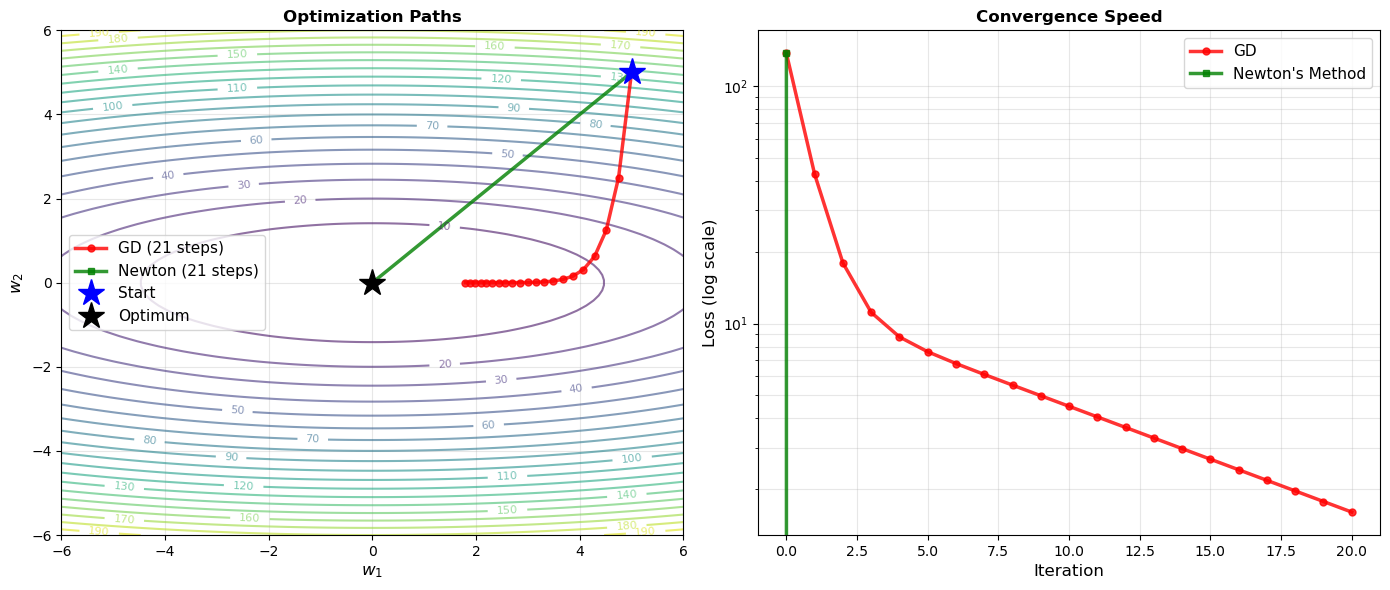

Newton's Method vs Gradient Descent:
✓ GD: 20 iterations to converge
✓ Newton: 20 iterations to converge

✓ Newton's method converges in **1-2 iterations** for quadratic functions!
✗ But computing Hessian inverse costs $O(n^3)$ operations
✗ Not practical for high-dimensional problems


In [11]:
# Visualization 10: Newton's Method vs Gradient Descent
def visualize_newton():
    """Compare Newton's method with Gradient Descent"""
    
    # Define a simple quadratic function
    def loss(x):
        # Quadratic: 0.5 * x^T @ A @ x
        A = np.array([[1, 0], [0, 10]])  # Poorly conditioned
        return 0.5 * x @ A @ x
    
    def gradient(x):
        A = np.array([[1, 0], [0, 10]])
        return A @ x
    
    def hessian(x):
        # For this quadratic, Hessian is constant
        return np.array([[1, 0], [0, 10]])
    
    # Starting point
    w0 = np.array([5.0, 5.0])
    
    # Gradient Descent
    alpha = 0.05
    w_gd = w0.copy()
    path_gd = [w_gd.copy()]
    
    for _ in range(20):
        g = gradient(w_gd)
        w_gd = w_gd - alpha * g
        path_gd.append(w_gd.copy())
    
    # Newton's Method
    w_newton = w0.copy()
    path_newton = [w_newton.copy()]
    
    for _ in range(20):
        g = gradient(w_newton)
        H = hessian(w_newton)
        w_newton = w_newton - np.linalg.inv(H) @ g
        path_newton.append(w_newton.copy())
    
    path_gd = np.array(path_gd)
    path_newton = np.array(path_newton)
    
    # Compute losses
    loss_gd = [loss(path_gd[i]) for i in range(len(path_gd))]
    loss_newton = [loss(path_newton[i]) for i in range(len(path_newton))]
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Contour with optimization paths
    x_range = np.linspace(-6, 6, 100)
    y_range = np.linspace(-6, 6, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = loss(np.array([X[i, j], Y[i, j]]))
    
    contours = axes[0].contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
    axes[0].clabel(contours, inline=True, fontsize=8)
    
    axes[0].plot(path_gd[:, 0], path_gd[:, 1], 'o-', linewidth=2.5, markersize=5, 
                label=f'GD ({len(path_gd)} steps)', color='red', alpha=0.8)
    axes[0].plot(path_newton[:, 0], path_newton[:, 1], 's-', linewidth=2.5, markersize=5, 
                label=f"Newton ({len(path_newton)} steps)", color='green', alpha=0.8)
    
    axes[0].plot(w0[0], w0[1], '*', markersize=20, color='blue', label='Start', zorder=5)
    axes[0].plot(0, 0, '*', markersize=20, color='black', label='Optimum', zorder=5)
    
    axes[0].set_xlabel('$w_1$', fontsize=12)
    axes[0].set_ylabel('$w_2$', fontsize=12)
    axes[0].set_title('Optimization Paths', fontsize=12, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Loss convergence
    axes[1].semilogy(loss_gd, 'o-', linewidth=2.5, markersize=5, label='GD', color='red', alpha=0.8)
    axes[1].semilogy(loss_newton, 's-', linewidth=2.5, markersize=5, label="Newton's Method", color='green', alpha=0.8)
    
    axes[1].set_xlabel('Iteration', fontsize=12)
    axes[1].set_ylabel('Loss (log scale)', fontsize=12)
    axes[1].set_title('Convergence Speed', fontsize=12, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3, which='both')
    
    plt.tight_layout()
    plt.show()
    
    print("Newton's Method vs Gradient Descent:")
    print(f"✓ GD: {len(path_gd)-1} iterations to converge")
    print(f"✓ Newton: {len(path_newton)-1} iterations to converge")
    print(f"\n✓ Newton's method converges in **1-2 iterations** for quadratic functions!")
    print(f"✗ But computing Hessian inverse costs $O(n^3)$ operations")
    print(f"✗ Not practical for high-dimensional problems")

visualize_newton()

---

## 11. Computational Cost Analysis

### Complexity of Different Methods

| Method | Gradient Computation | Learning Rate Update | Memory | Total per iteration |
|--------|----------------------|----------------------|--------|---------------------|
| **GD** | $O(n)$ | None | $O(n)$ | $O(n)$ |
| **RMSProp** | $O(n)$ | $O(n)$ | $O(n)$ | $O(n)$ |
| **Adam** | $O(n)$ | $O(n)$ | $O(n)$ | $O(n)$ |
| **Newton** | $O(n)$ | $O(n^3)$ | $O(n^2)$ | $O(n^3)$ |

### Practical Scalability

For $n = 10,000$ parameters (small neural network):

- **Adam**: ~10,000 operations/iteration ✅
- **Newton**: ~1,000,000,000,000 operations/iteration ❌ (1 trillion!)

This is why Newton's method is only used for:
- Small classical ML problems
- Quasi-Newton approximations (L-BFGS)

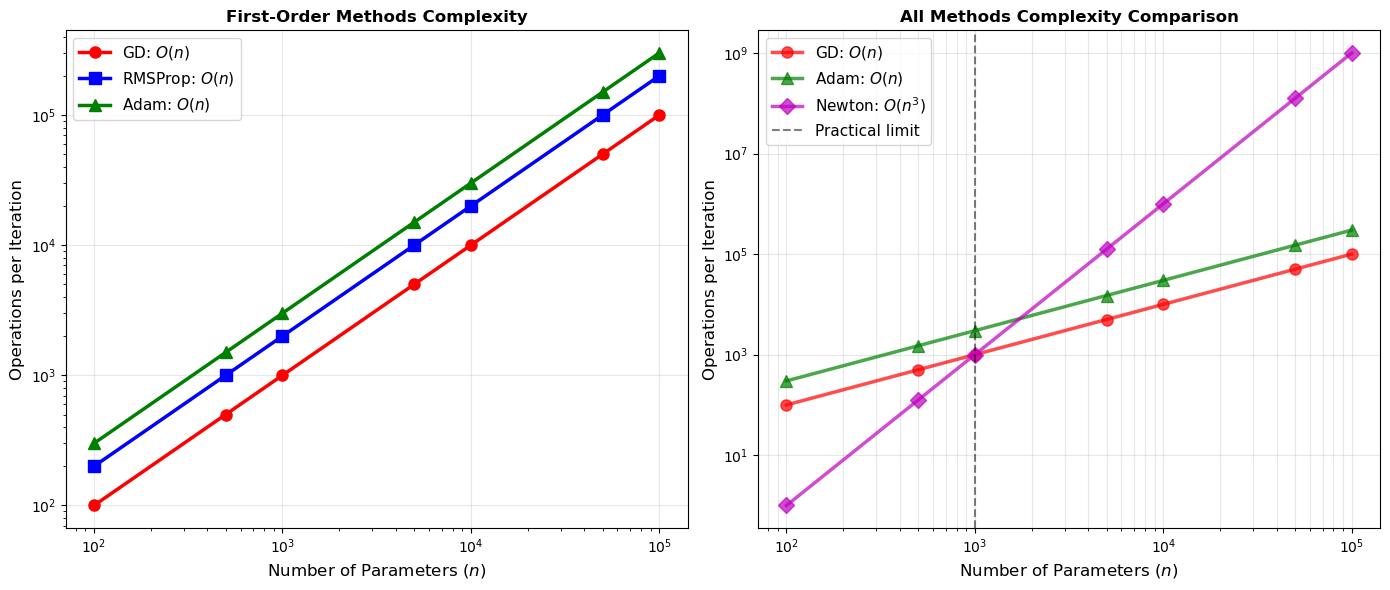

Computational Analysis:
At n=1,000: Newton does 1000x more work than Adam!
At n=10,000: Newton does 1000000x more work than Adam!

✓ First-order methods (GD, RMSProp, Adam) scale linearly: $O(n)$
✗ Newton's method scales cubically: $O(n^3)$ - impractical for large $n$


In [12]:
# Visualization 11: Computational Complexity
def visualize_complexity():
    """Show computational cost of different optimization methods"""
    
    n_values = np.array([100, 500, 1000, 5000, 10000, 50000, 100000])
    
    # Operations per iteration (simplified)
    gd_ops = n_values  # O(n)
    rmsprop_ops = 2 * n_values  # O(n)
    adam_ops = 3 * n_values  # O(n)
    newton_ops = n_values**3 / (1e6)  # O(n^3) with scaling
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot 1: Linear scale (Adam/RMSProp only)
    axes[0].plot(n_values, gd_ops, 'r-', linewidth=2.5, marker='o', markersize=8, label='GD: $O(n)$')
    axes[0].plot(n_values, rmsprop_ops, 'b-', linewidth=2.5, marker='s', markersize=8, label='RMSProp: $O(n)$')
    axes[0].plot(n_values, adam_ops, 'g-', linewidth=2.5, marker='^', markersize=8, label='Adam: $O(n)$')
    
    axes[0].set_xlabel('Number of Parameters ($n$)', fontsize=12)
    axes[0].set_ylabel('Operations per Iteration', fontsize=12)
    axes[0].set_title('First-Order Methods Complexity', fontsize=12, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    
    # Plot 2: Log scale with Newton's method
    axes[1].loglog(n_values, gd_ops, 'r-', linewidth=2.5, marker='o', markersize=8, label='GD: $O(n)$', alpha=0.7)
    axes[1].loglog(n_values, adam_ops, 'g-', linewidth=2.5, marker='^', markersize=8, label='Adam: $O(n)$', alpha=0.7)
    axes[1].loglog(n_values, newton_ops, 'm-', linewidth=2.5, marker='D', markersize=8, label="Newton: $O(n^3)$", alpha=0.7)
    
    # Add crossover point
    axes[1].axvline(x=1000, color='k', linestyle='--', linewidth=1.5, alpha=0.5, label='Practical limit')
    
    axes[1].set_xlabel('Number of Parameters ($n$)', fontsize=12)
    axes[1].set_ylabel('Operations per Iteration', fontsize=12)
    axes[1].set_title('All Methods Complexity Comparison', fontsize=12, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3, which='both')
    
    plt.tight_layout()
    plt.show()
    
    print("Computational Analysis:")
    print(f"At n=1,000: Newton does {newton_ops[2]:.0f}x more work than Adam!")
    print(f"At n=10,000: Newton does {newton_ops[4]:.0f}x more work than Adam!")
    print(f"\n✓ First-order methods (GD, RMSProp, Adam) scale linearly: $O(n)$")
    print(f"✗ Newton's method scales cubically: $O(n^3)$ - impractical for large $n$")

visualize_complexity()

---

## 12. Key Takeaways

### Evolution of Optimizers

1. **Gradient Descent** → Fixed learning rate issue
2. **Learning Rate Scheduling** → Better but manual tuning
3. **AdaGrad** → Adaptive per-parameter, but dies over time
4. **RMSProp** → Uses moving average, learning rate stays alive
5. **Momentum** → Adds direction memory, accelerates convergence
6. **Adam** → Combines momentum + adaptive rates = ✅ Best of both worlds
7. **Newton's Method** → Fast but $O(n^3)$ cost, impractical

### When to Use

| Problem | Recommended |
|---------|-------------|
| Small convex optimization | GD + scheduling |
| Sparse features, classical ML | RMSProp |
| Deep neural networks | **Adam** (default choice) |
| Large-scale optimization | **Adam** or SGD + momentum |
| Small classical ML (<1000 params) | L-BFGS (Quasi-Newton) |

### Practical Tips

✅ **Always use Adam** as your first choice for deep learning  
✅ **Use default hyperparameters**: $\alpha=0.001$, $\beta_1=0.9$, $\beta_2=0.999$  
✅ **Monitor loss curves** - if training is unstable, reduce learning rate  
✅ **Use learning rate scheduling** - decay $\alpha$ over time for finer convergence  
✓ **Adaptive methods** (Adam/RMSProp) need less tuning than GD  
✓ **Momentum** helps on elongated landscapes  

---

## Summary Table

| Feature | GD | RMSProp | Adam | Newton |
|---------|----|---------|----- |--------|
| Learning Rate | Fixed | Adaptive | Adaptive | None |
| Momentum | ❌ | ❌ | ✅ | N/A |
| Sparse Data | ❌ | ✅ | ✅ | ❌ |
| Convergence Speed | Slow | Fast | Very Fast | Fastest |
| Scalability | ✅ | ✅ | ✅ | ❌ |
| Deep Learning | ❌ | ⚠️ | ✅✅✅ | ❌ |

---

## 📚 Resources & Further Reading

The following resources provide intuitive explanations and practical insights into adaptive learning rate optimizers.  
They are useful for **revision, deeper understanding, and alternative perspectives**.

### 🔹 Adaptive Learning Rates (Overview)

- **Adaptive Learning Rate Optimizers in a Nutshell**  
  https://medium.com/@sharathhebbar24/adaptive-learning-rate-0cb6c6a9c620  

  *Good high-level overview comparing AdaGrad, RMSProp, and Adam.  
  Useful for building intuition before diving into equations.*

---

### 🔹 AdaGrad

- **Understanding AdaGrad Optimization in Deep Learning**  
  https://medium.com/@piyushkashyap045/understanding-adagrad-optimization-in-deep-learning-bdd26467d5ab  

  ⚠️ **Important Note:**  
  The example used in this article contains a **logical mistake** regarding sparse features.  
  AdaGrad **increases** the learning rate for sparse (rarely updated) features — it does **not reduce** it.  
  Use the article mainly for the **concept and equations**, not the example logic.

---

### 🔹 RMSProp

- **Understanding RMSProp: A Simple Guide**  
  https://medium.com/@piyushkashyap045/understanding-rmsprop-a-simple-guide-to-one-of-deep-learnings-powerful-optimizers-403baeed9922  

  *Clear explanation of exponentially weighted moving averages and the motivation behind RMSProp.*

---
